In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

I'm taking in data we got for a 1D model of the Io Torus Plasma Density, and overlaying it on top of an image we made with the whistler data

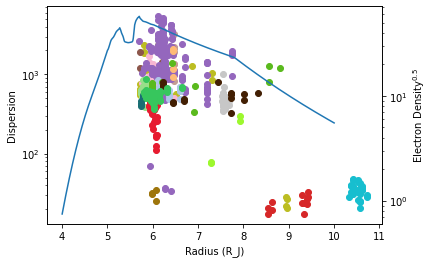

In [81]:
NerneyTable = pd.read_csv(glob.glob('*Nerney2025*')[0]) #Import the data
WhistlerTable = pd.read_csv(glob.glob('WhistlerData*')[0]) #Import the data
WhistlerTable.columns = WhistlerTable.columns.str.strip()
colors= [ 0xFF9EDAE5, 0xFF17BECF, 0xFFBCBD22, 0xFFC7C7C7, 0xFFF7B6D2, \
          0xFFC49C94, 0xFF8C564B, 0xFF9467BD, 0xFFD62728, 0xFF98DF8A, \
          0xFFFFBB78, 0xFFAEC7E8, 0x9DF82E, 0xFF5ABA1D, 0xFFE71B30, \
          0xFF421F03, 0xFF9E750B, 0xFF1A6E73, 0xFF37C65D] #copied from reproducePlot.jy
colors_hex = [f"#{c & 0xFFFFFF:06x}" for c in colors] #not 100% sure on how this works but I need colors to be not in hex values
#matplotlib wants #RRGGBB and not 0xAARRGGBB

fig, ax1 = plt.subplots()

ax1.set_xlabel(r'Radius (R_J)')
ax1.set_ylabel(r'Dispersion')
index = 0
for i in np.unique(WhistlerTable['YMD']):
    tempWhistlerTable = WhistlerTable[WhistlerTable['YMD'] == i]
    plt.scatter(tempWhistlerTable['mshell'], tempWhistlerTable['dispersionConstant'], color = colors_hex[index])
    plt.yscale('log')
    index=index+1
    
plt.twinx()    
plt.plot(NerneyTable['Rj'], NerneyTable['ne^.5'])
plt.ylabel(r'Electron Density$^{0.5}$')
plt.yscale('log')
    
    
    #plt.plot(ff + '?column=dispersionConstant&depend0=' + source + '&timeFormat=$Y$m$d+$H$M$S&where=YMD.eq(%s)' % dates[i], \
          #symbolSize=10, lineStyle='none', color= colors[i], yrange=[2e1,9e3], ylog=True, legendLabel=dates[i], xtitle=source, ytitle='Dispersion Constant' , overplotOf=dom.plots[p])

(5.0, 11.0)

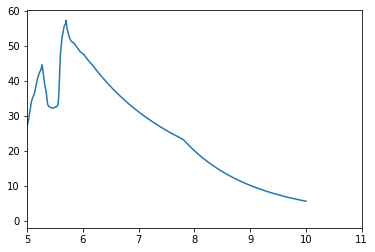

In [69]:
plt.plot(NerneyTable['Rj'], NerneyTable['ne^.5'])
plt.xlim(5, 11)